### Importing necessary Packages

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [1]:
#!pip install wordcloud

In [ ]:
#We will use imdb reviews data for sentiment Analysis 

In [6]:
imdb = pd.read_csv('C:/Users/Administrator/Documents/Unstructured DataAnalysis/Datasets/imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

## Bag of words Analysis

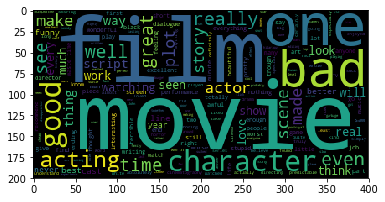

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string=' '.join(imdb['review'])           #joining my review data into one string (' ')
wc=WordCloud().generate(input_string)         
plt.imshow(wc)

In [15]:
# Got to clean our data first, lot of Junk -- Data Cleaning
# 1) convert all to lower case
# 2) Remove Junk characters
# 3) Remove commonly used words
# 4) Identifying root of the words (play, playing, plays, played) --  Use steming

In [17]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')            # Retaining a-z and space. Removing everything else.

In [25]:
stopwords = nltk.corpus.stopwords.words('english')                      # around 179 stopwords-commonly used english words
#stopwords

In [27]:
stemmer = nltk.stem.PorterStemmer()

In [32]:
docs_clean = []
for doc in docs.head(2):                                                # split
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
            
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    
print(docs_clean)    

['slowmov aimless movi distress drift young man  ', 'sure lost  flat charact audienc nearli half walk  ']


In [35]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '') 

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

In [39]:
# Next step: (Document term matrix)
# 1) Rows --> representation of documents
# 2) column --> Terms/ unique words
# 3) sparse matrix --> mxn values. [more no. of zeros / compared to non-zeros]
# 4) row sum --> no. of terms in a doc
# 5) column sum --> total freq of a term across all documents 
# 6) high dimension data

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [43]:
# Sparsity = No. of Zeros / No. of rows * No. of columns

In [44]:
no_of_zeros = (748*2475)-6797
sparsity = (no_of_zeros)/(748*2475)*100
sparsity

99.63285259007183

In [49]:
df_dtm = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())                         # Uncompres data
(df_dtm == 0).sum().sum()

1844503

In [50]:
(748*2475)-1844503
#df_dtm.describe()

6797

In [53]:
df_dtm.sum().sort_values(ascending=False).head(20)

movi       207
film       184
one         79
bad         67
like        59
charact     58
good        56
time        49
watch       48
act         46
see         43
great       41
realli      41
even        39
love        37
make        33
scene       33
stori       32
well        31
look        29
dtype: int64

In [54]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(20)

136    686
19     425
646    408
149    131
135    107
422     41
192     37
223     34
271     31
230     29
278     28
423     28
606     27
177     26
605     25
474     24
465     24
194     23
562     23
237     23
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x =train_test_split(df_dtm, test_size=0.2, random_state=100)

In [59]:
train_y = imdb.iloc[train_x.index]['sentiment']
test_y  = imdb.iloc[test_x.index]['sentiment']

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=100, n_estimators=300)
rf_model.fit(train_x, train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y, rf_predict_class)

0.72